In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)#setting ".max_columns" parameter to 500 to display all the columns present in the dataset

In [83]:
path = 'Downloads/twitter_training.csv'
path1= 'Downloads/twitter_validation.csv'

In [266]:
Sentiment=pd.concat([data,data1],ignore_index=True)
Sentiment

,ID,Entity,Sentiment,Content,Topic,Tweet,tweet length
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,NaN,NaN,NaN
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
72651,4891,NaN,Irrelevant,NaN,GrandTheftAuto(GTA),⭐️ Toronto is the arts and culture capital of ...,47.0
72652,4359,NaN,Irrelevant,NaN,CS-GO,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,45.0
72653,2652,NaN,Positive,NaN,Borderlands,Today sucked so it’s time to drink wine n play...,24.0
72654,8069,NaN,Positive,NaN,Microsoft,Bought a fraction of Microsoft today. Small wins.,8.0


In [87]:
data1=pd.read_csv(path1)
data1.head(10)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


In [128]:
data1.tail()

,ID,Topic,Sentiment,Tweet,tweet length
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,47
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,45
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,24
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,8
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...,16


In [85]:
data=pd.read_csv(path)
data.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [130]:
data.tail()

,ID,Entity,Sentiment,Content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [95]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
data = pd.read_csv(path, names=col_names)
data

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [99]:
col_names = names=['ID', 'Topic', 'Sentiment', 'Tweet']
data1 = pd.read_csv(path1, names=col_names)
data1

,ID,Topic,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [134]:
data.columns

Index(['ID', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [136]:
data1.columns

Index(['ID', 'Topic', 'Sentiment', 'Tweet', 'tweet length'], dtype='object')

In [138]:
data.describe()

,ID
count,71656.000000
mean,6436.437242
std,3742.291368
min,1.000000
25%,3199.000000
50%,6432.500000
75%,9604.000000
max,13200.000000


In [142]:
data1.describe()

,ID,tweet length
count,1000.000000,1000.000000
mean,6432.088000,20.701000
std,3728.310569,13.354023
min,6.000000,1.000000
25%,3247.750000,10.000000
50%,6550.000000,17.000000
75%,9661.750000,31.000000
max,13197.000000,57.000000


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71656 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         71656 non-null  int64 
 1   Entity     71656 non-null  object
 2   Sentiment  71656 non-null  object
 3   Content    71656 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [148]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1000 non-null   int64 
 1   Topic         1000 non-null   object
 2   Sentiment     1000 non-null   object
 3   Tweet         1000 non-null   object
 4   tweet length  1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [150]:
data.size

286624

In [156]:
data1.size

5000

In [97]:
data.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [61]:
data1.isnull().sum()

ID           0
Topic        0
Sentiment    0
Tweet        0
dtype: int64

In [101]:
data= data.dropna()
data

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [103]:
data.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [105]:
data.duplicated().sum()

2340

In [107]:
data1.duplicated().sum()

0

In [109]:
data = data.drop_duplicates()

In [111]:
data.duplicated().sum()

0

<Axes: xlabel='tweet length', ylabel='Count'>

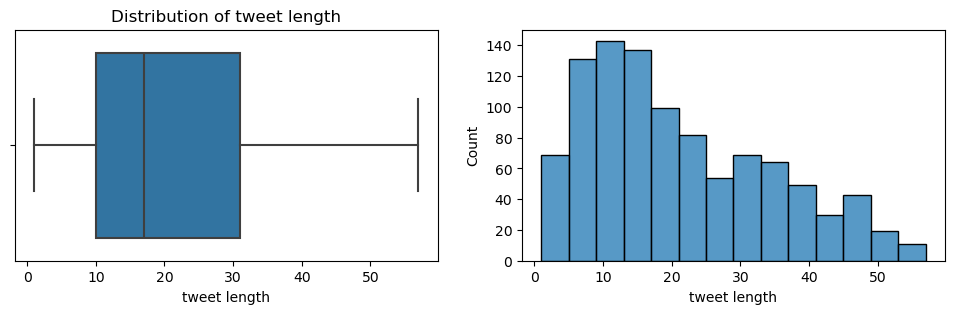

In [117]:
data1["tweet length"] = data1["Tweet"].map(lambda x:len(x.split(" ")))
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(x="tweet length",data=data1).set(title='Distribution of tweet length')
plt.subplot(1,2,2)
sns.histplot(x="tweet length",data=data1)

Text(0.5, 0, 'Sentiment Analysis')

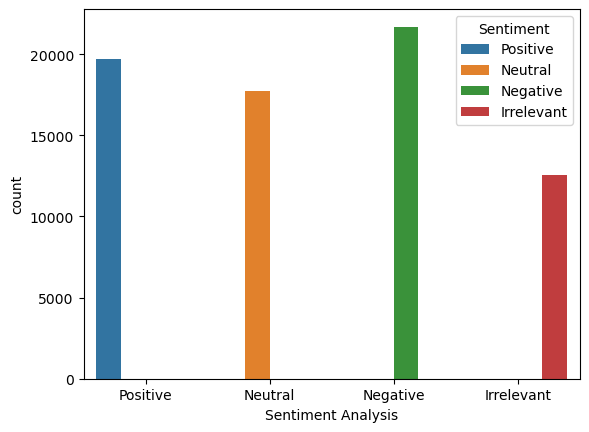

In [174]:
sns.countplot(x="Sentiment",data=data,hue="Sentiment")
plt.xlabel("Sentiment Analysis")

Text(0.5, 1.0, 'Frequency of entity')

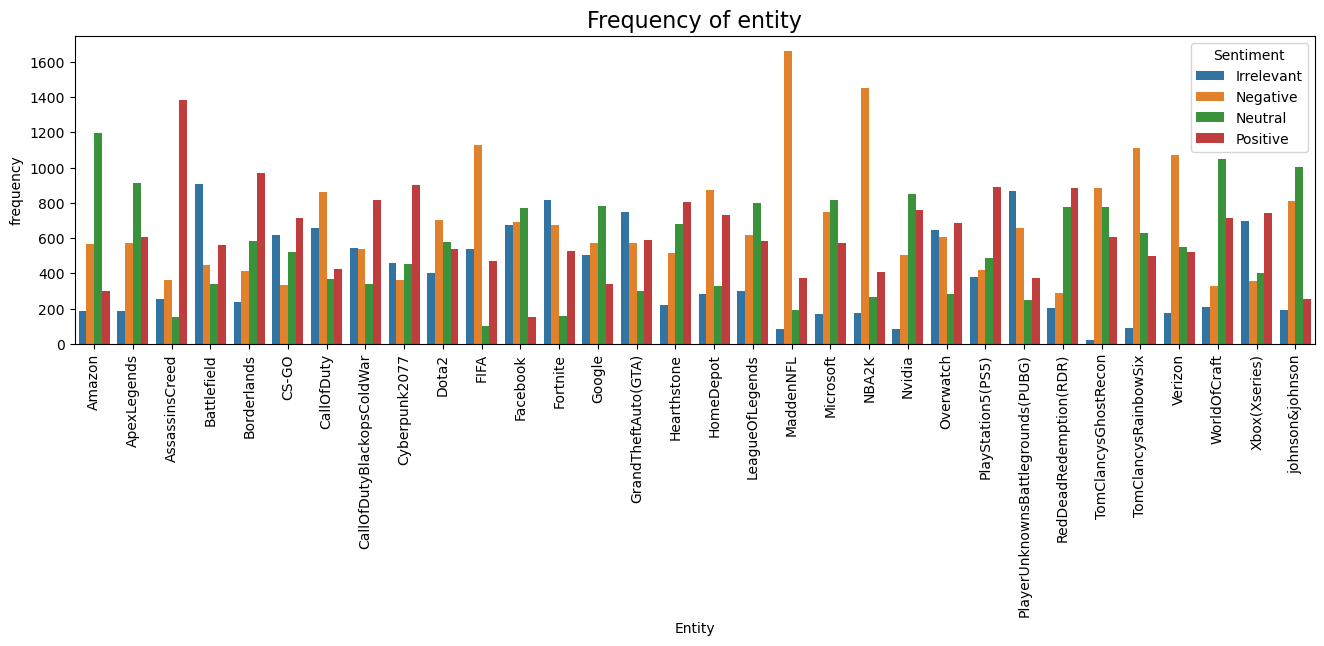

In [124]:
entity_frequency = data.groupby(["Sentiment","Entity"]).size().reset_index()
entity_frequency.rename(columns={0: 'frequency'}, inplace=True)
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.barplot(data=entity_frequency,x="Entity",y="frequency",hue="Sentiment").set_title("Frequency of entity", fontsize=16)

In [197]:
brand_data = data[data['Entity'].str.contains('Facebook', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Neutral       773
Negative      690
Irrelevant    672
Positive      154
Name: count, dtype: int64

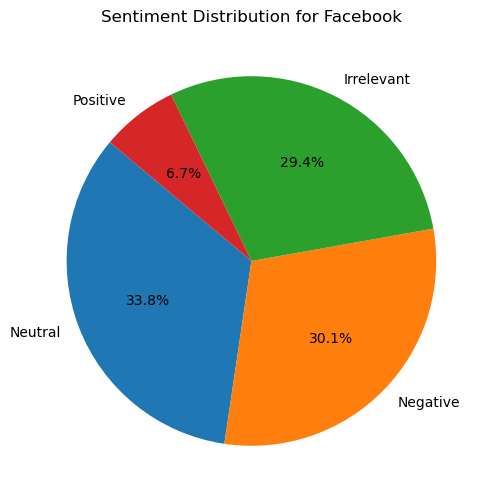

In [199]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Facebook')
plt.show()

In [227]:
data.Sentiment.head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: Sentiment, dtype: object

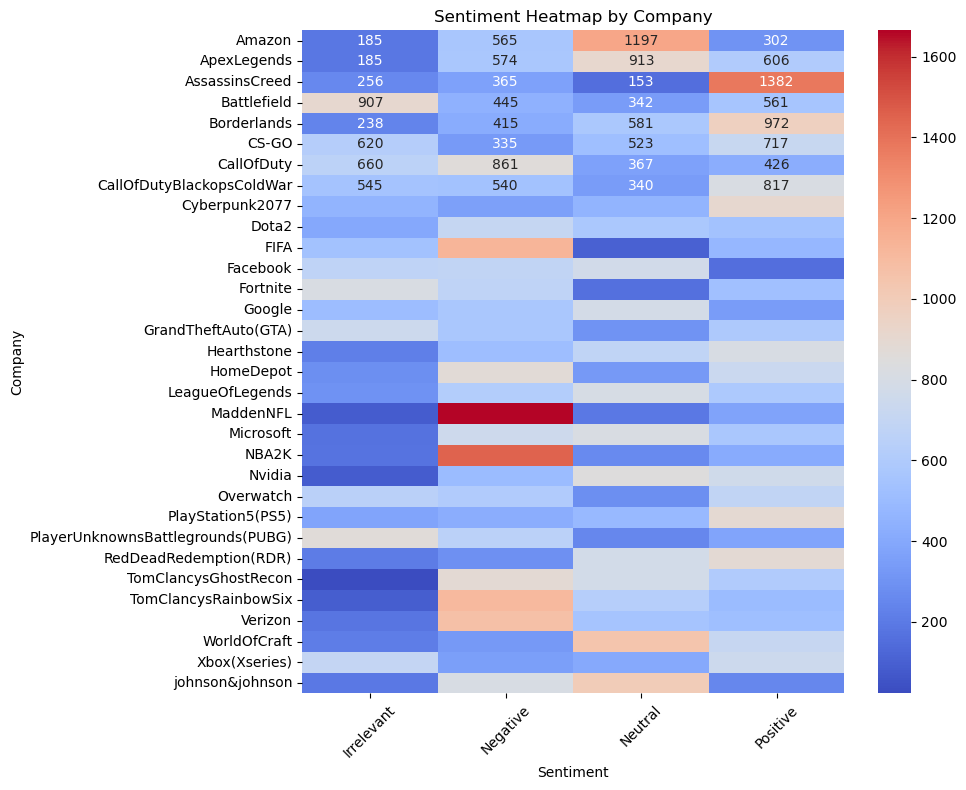

In [276]:
# Explore additional techniques like topic modeling and sentiment heatmaps for more nuanced analysis
plt.figure(figsize=(10, 8))
sentiment_heatmap = Sentiment.pivot_table(index='Entity', columns='Sentiment', aggfunc='size', fill_value=0)
sns.heatmap(sentiment_heatmap, cmap='coolwarm', annot=True, fmt='d')
plt.title('Sentiment Heatmap by Company')
plt.xlabel('Sentiment')
plt.ylabel('Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()